In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
import os
if not os.path.exists("../input/house-prices-advanced-regression-techniques/train.csv"):
    os.symlink("../input/house-prices-advanced-regression-techniques/test.csv", "../input/train.csv")  
    os.symlink("../input/house-prices-advanced-regression-techniques/test.csv", "../input/test.csv") 
    
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

In [3]:
X_full.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
X_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
X_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

# Missing Values

<AxesSubplot:ylabel='Id'>

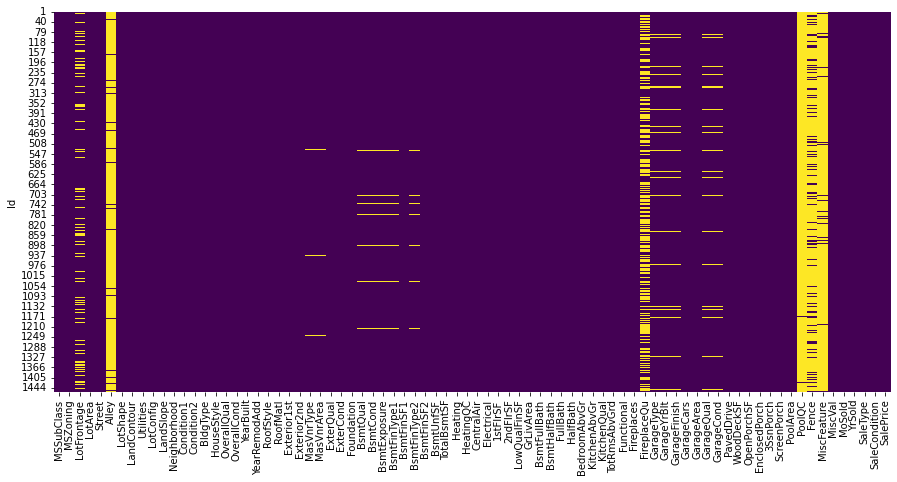

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
sns.heatmap(X_full.isnull(), cbar=False, cmap="viridis")

<AxesSubplot:ylabel='Id'>

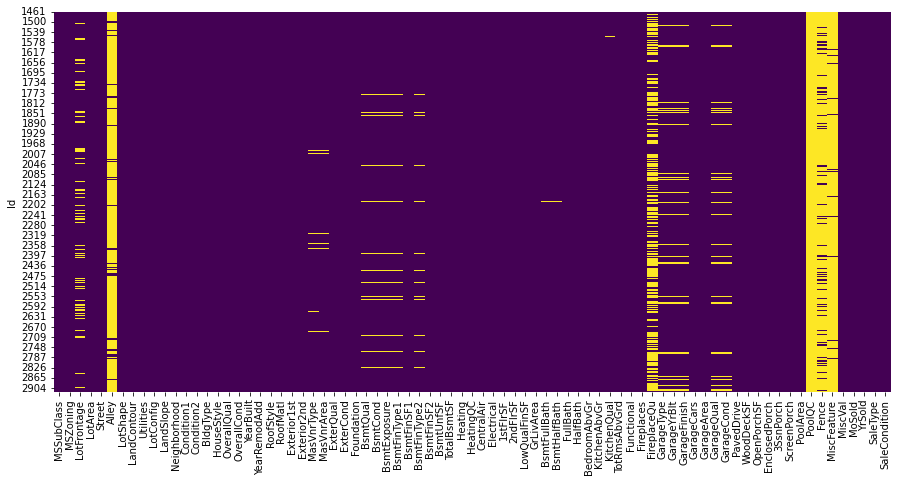

In [7]:
plt.figure(figsize=(15,7))
sns.heatmap(X_test_full.isnull(), cbar=False, cmap="viridis")

In [8]:
# To keep things simple, we'll use only numerical predictors
X = X_full.select_dtypes(exclude=['object'])
X_test = X_test_full.select_dtypes(exclude=['object'])

y = X_full.SalePrice

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

## Drop missing

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Fill in the line below: get names of columns with missing values
cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

# Fill in the lines below: drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)


# Define and fit model
model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(reduced_X_train, y_train)

# Get validation predictions and MAE
preds_valid = model.predict(reduced_X_valid)
print("MAE (Your approach):")
print(mean_absolute_error(y_valid, preds_valid))

MAE (Your approach):
909.0415068493146


## Impute missing

In [10]:
from sklearn.impute import SimpleImputer

# Imputation
final_imputer = SimpleImputer(strategy='median')
final_X_train = pd.DataFrame(final_imputer.fit_transform(X_train))
final_X_valid = pd.DataFrame(final_imputer.transform(X_valid))

# Imputation removed column names; put them back
final_X_train.columns = X_train.columns
final_X_valid.columns = X_valid.columns

In [11]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error

# function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = XGBRegressor(n_estimators=1000, random_state=0, n_jobs=4, 
                         early_stopping_rounds=5, 
                         eval_set=[(X_valid, y_valid)],
                         verbose=False)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

score_dataset(final_X_train,final_X_valid,y_train,y_valid)

[17:12:22] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_set", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




1048.150444135274

# Categorical Variables

In [12]:
# To keep things simple, we'll use only numerical predictors
X = X_full
X_test = X_test_full

y = X_full.SalePrice
X.drop(['SalePrice'], axis=1, inplace=True)

# To keep things simple, we'll drop columns with missing values
cols_with_missing = [col for col in X.columns if X[col].isnull().any()] 
#X.drop(cols_with_missing, axis=1, inplace=True)
#X_test.drop(cols_with_missing, axis=1, inplace=True)


# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)


Ordinal Encoder

In [13]:
# All categorical columns
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely label encoded
good_label_cols = [col for col in object_cols if 
                   set(X_train[col]) == set(X_valid[col])]
        
# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
print('Categorical columns that will be label encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

# Drop categorical columns that will not be encoded
label_X_train = X_train.drop(bad_label_cols, axis=1)
label_X_valid = X_valid.drop(bad_label_cols, axis=1)

# Apply label encoder 
ordinal_encoder = OrdinalEncoder()
label_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
label_X_valid[good_label_cols] = ordinal_encoder.transform(X_valid[good_label_cols])

print("MAE from Approach 2 (Label Encoding):") 
print(score_dataset(label_X_train, label_X_valid, y_train, y_valid))

Categorical columns that will be label encoded: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'BldgType', 'HouseStyle', 'MasVnrType', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'CentralAir', 'KitchenQual', 'FireplaceQu', 'GarageFinish', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'SaleCondition']

Categorical columns that will be dropped from the dataset: ['RoofStyle', 'ExterCond', 'Exterior2nd', 'HeatingQC', 'Heating', 'LandSlope', 'Foundation', 'Exterior1st', 'RoofMatl', 'Utilities', 'Condition2', 'GarageType', 'MiscFeature', 'Electrical', 'Neighborhood', 'GarageQual', 'Functional', 'SaleType', 'BsmtCond', 'Condition1']
MAE from Approach 2 (Label Encoding):
[17:12:27] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_set", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or 

One-Hot Encoder

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Columns that will be one-hot encoded
low_cardinality_cols = [col for col in object_cols if X_train[col].nunique() < 10]

# Columns that will be dropped from the dataset
high_cardinality_cols = list(set(object_cols)-set(low_cardinality_cols))

# Use as many lines of code as you need!
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[low_cardinality_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[low_cardinality_cols]))
# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index
OH_cols_test.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

print("MAE from Approach 3 (One-Hot Encoding):") 
print(score_dataset(OH_X_train, OH_X_valid, y_train, y_valid))

MAE from Approach 3 (One-Hot Encoding):
[17:12:34] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds", "eval_set", "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


17831.33639233733


## Pipeline

In [15]:
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols + ['Neighborhood']
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = X_test[my_cols].copy()

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE:', mean_absolute_error(y_valid, preds))

MAE: 17861.780102739725


## Cross Validation

In [16]:
# from sklearn.model_selection import cross_val_score

# # # Multiply by -1 since sklearn calculates *negative* MAE
# # scores = -1 * cross_val_score(my_pipeline, X, y,
# #                               cv=5,
# #                               scoring='neg_mean_absolute_error')

# # # remember the mean score
# # print("Average MAE score:", scores.mean())

# def get_score(n_estimators):
#     """Return the average MAE over 3 CV folds of random forest model.
    
#     Keyword argument:
#     n_estimators -- the number of trees in the forest
#     """
#     # Replace this body with your own code
#     # Define model
#     model = RandomForestRegressor(n_estimators=n_estimators, random_state=0)
#     # Reuse the preprocessor from the previous
#     # Bundle preprocessing and modeling code in a pipeline
#     clf = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('model', model)
#                          ])
#     scores = -1 * cross_val_score(clf, X, y,
#                               cv=5,
#                               scoring='neg_mean_absolute_error')
#     return scores.mean()

# results = {i:get_score(i) for i in range(50,401,50)}# Your code here

# plt.plot(list(results.keys()), list(results.values()))
# plt.show()

select the best parameter value

In [17]:
# Define model
model = RandomForestRegressor(n_estimators=350, random_state=0, n_jobs=4)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)

print('MAE for best paramter:', mean_absolute_error(y_valid, preds))

MAE for best paramter: 17468.252230919763


## XGBoost

In [18]:
from sklearn.model_selection import cross_val_score

def score_dataset(X, y, model=XGBRegressor()):
    # Label encoding for categoricals
    for colname in X.select_dtypes(["category", "object"]):
        X[colname], _ = X[colname].factorize()
    # Metric for Housing competition is RMSLE (Root Mean Squared Log Error)
    score = cross_val_score(
        model, X, y, cv=5, scoring="neg_mean_squared_log_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

### Submission 1

In [19]:
preds_test = clf.predict(X_test)
# Save test predictions to submission file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)

## Mutual Information

In [20]:
# from sklearn.feature_selection import mutual_info_regression

# # Utility functions from Tutorial
# def make_mi_scores(X, y):
#     X = X.copy()
#     for colname in X.select_dtypes(["object", "category"]):
#         X[colname], _ = X[colname].factorize()
#     # All discrete features should now have integer dtypes
#     discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
#     mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores


# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")
    
# print(mi_scores.head(20))
# # print(mi_scores.tail(20))  # uncomment to see bottom 20

# plt.figure(dpi=100, figsize=(8, 5))
# plot_mi_scores(mi_scores.head(20))
# # plot_mi_scores(mi_scores.tail(20))  # uncomment to see bottom 20

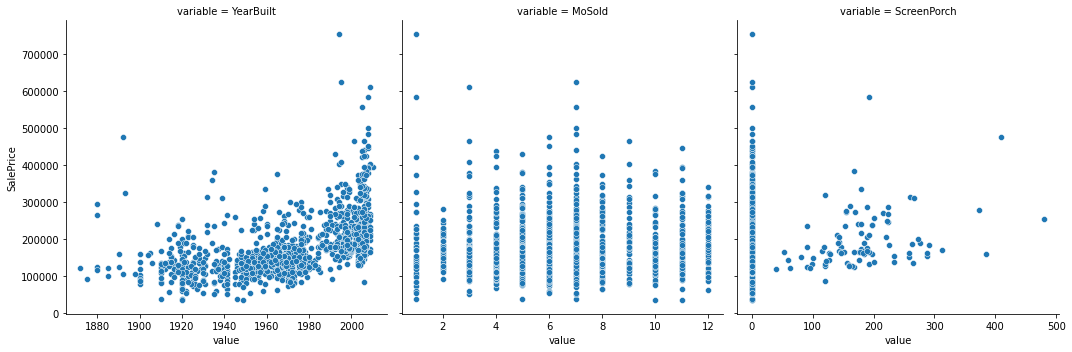

In [21]:
features = ["YearBuilt", "MoSold", "ScreenPorch"]
X_train['SalePrice'] = y_train

sns.relplot(
    x="value", y="SalePrice", col="variable", data=X_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

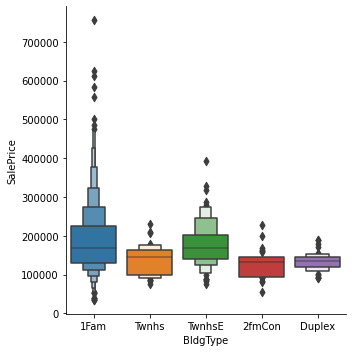

In [22]:
sns.catplot(x="BldgType", y="SalePrice", data=X_train, kind="boxen");

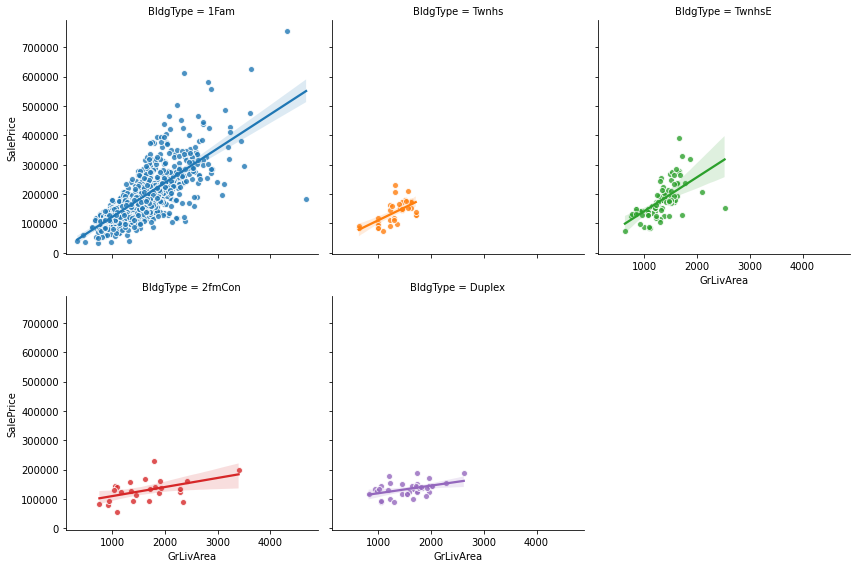

In [23]:
# YOUR CODE HERE: 
feature = "GrLivArea"

sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=X_train, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

## Creating Features

### Mathematical Transform

In [24]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [25]:
X_1 = pd.DataFrame()  # dataframe to hold new features
X_1["LivLotRatio"] = X["GrLivArea"]/X['LotArea']
X_1["Spaciousness"] = (X['1stFlrSF']+X['2ndFlrSF'])/X['TotRmsAbvGrd']
X_1["TotalOutsideSF"] = X['WoodDeckSF']+X['OpenPorchSF']+X['EnclosedPorch']+X['3SsnPorch']+X['ScreenPorch']
# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
X_2 = pd.get_dummies(X['BldgType'], prefix="Bldg")
X_2 = X_2.mul(X['GrLivArea'], axis=0)
X_3 = pd.DataFrame()
features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
X_3["PorchTypes"] = X[features].gt(0).sum(axis=1)
# X_4 = pd.DataFrame()
# X_4["MSClass"] = X.MSSubClass.str.split("_",n=1,expand=True)[0]
X_5 = pd.DataFrame()
X_5["MedNhbdArea"] = X.groupby("Neighborhood")["GrLivArea"].transform("median")
X_new = X.join([X_1, X_2, X_3,X_5])

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X_new, y, train_size=0.8, test_size=0.2, random_state=0)

X_1 = pd.DataFrame()  # dataframe to hold new features
X_1["LivLotRatio"] = X_test["GrLivArea"]/X_test['LotArea']
X_1["Spaciousness"] = (X_test['1stFlrSF']+X_test['2ndFlrSF'])/X_test['TotRmsAbvGrd']
X_1["TotalOutsideSF"] = X_test['WoodDeckSF']+X_test['OpenPorchSF']+X_test['EnclosedPorch']+X_test['3SsnPorch']+X_test['ScreenPorch']
# One-hot encode BldgType. Use `prefix="Bldg"` in `get_dummies`
X_2 = pd.get_dummies(X_test['BldgType'], prefix="Bldg")
X_2 = X_2.mul(X_test['GrLivArea'], axis=0)
X_3 = pd.DataFrame()
features = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
X_3["PorchTypes"] = X_test[features].gt(0).sum(axis=1)
# X_4 = pd.DataFrame()
# X_4["MSClass"] = X_test.MSSubClass.split("_",n=1,expand=True)[0]
X_5 = pd.DataFrame()
X_5["MedNhbdArea"] = X_test.groupby("Neighborhood")["GrLivArea"].transform("median")

X_test_new = X_test.join([X_1, X_2, X_3,X_5])

Define Pipeline

# 2) Create a Feature of Cluster Labels

Creating a k-means clustering with the following parameters:
- features: `LotArea`, `TotalBsmtSF`, `FirstFlrSF`, `SecondFlrSF`,`GrLivArea`
- number of clusters: 10
- iterations: 10

In [26]:
from sklearn.cluster import KMeans
X = X_new.copy()
X_test = X_test_new.copy()

# YOUR CODE HERE: Define a list of the features to be used for the clustering
features = ["LotArea", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF","GrLivArea"]


# Standardize
X_scaled = X.loc[:, features]
X_scaled = (X_scaled - X_scaled.mean(axis=0)) / X_scaled.std(axis=0)
X_scaled_test = X_test.loc[:, features]
X_scaled_test = (X_scaled_test - X_scaled_test.mean(axis=0)) / X_scaled_test.std(axis=0)
# Fill missing
final_imputer = SimpleImputer(strategy='median')
final_X_scaled_test = pd.DataFrame(final_imputer.fit_transform(X_scaled_test))

# YOUR CODE HERE: Fit the KMeans model to X_scaled and create the cluster labels
kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)
X["Cluster"] = kmeans.fit_predict(X_scaled)
X_test["Cluster"] = kmeans.predict(final_X_scaled_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


Visualize Cluster

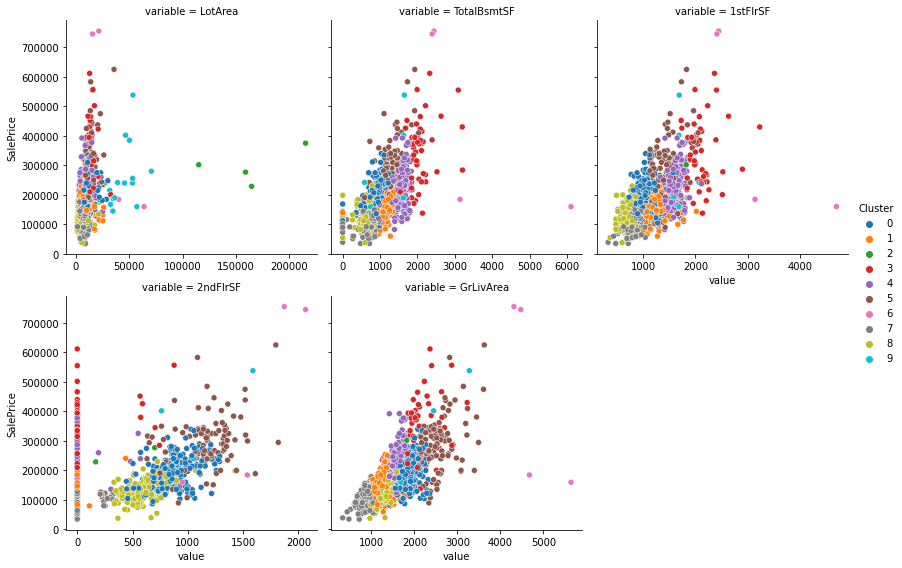

In [27]:
Xy = X.copy()
Xy["Cluster"] = Xy.Cluster.astype("category")
Xy["SalePrice"] = y
sns.relplot(
    x="value", y="SalePrice", hue="Cluster", col="variable",
    height=4, aspect=1, facet_kws={'sharex': False}, col_wrap=3,
    data=Xy.melt(
        value_vars=features, id_vars=["SalePrice", "Cluster"],
    ),
);


-------------------------------------------------------------------------------

The k-means algorithm offers an alternative way of creating features. Instead of labelling each feature with the nearest cluster centroid, it can measure the distance from a point to all the centroids and return those distances as features.

# 3) Cluster-Distance Features

Now add the cluster-distance features to your dataset. You can get these distance features by using the `fit_transform` method of `kmeans` instead of `fit_predict`.

In [28]:
# kmeans = KMeans(n_clusters=10, n_init=10, random_state=0)


# # YOUR CODE HERE: Create the cluster-distance features using `fit_transform`
# X_cd = kmeans.fit_transform(X_scaled)


# # Label features and join to dataset
# X_cd = pd.DataFrame(X_cd, columns=[f"Centroid_{i}" for i in range(X_cd.shape[1])])
# X = X.join(X_cd)

Predict the result

In [29]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train[my_cols].copy()
X_valid = X_valid[my_cols].copy()
X_test = X_test[my_cols].copy()

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

from xgboost import XGBRegressor

# Define the model
my_model_2 =  XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', my_model_2)
                     ])

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = clf.predict(X_valid)
print('MAE for best paramter:', mean_absolute_error(y_valid, preds))

MAE for best paramter: 16633.795965325342


## Principal Component Analysis - PCA

In [30]:
from sklearn.decomposition import PCA

def apply_pca(X, standardize=True):
    # Standardize
    if standardize:
        X = (X - X.mean(axis=0)) / X.std(axis=0)
    # Create principal components
    pca = PCA()
    X_pca = pca.fit_transform(X)
    # Convert to dataframe
    component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
    X_pca = pd.DataFrame(X_pca, columns=component_names)
    # Create loadings
    loadings = pd.DataFrame(
        pca.components_.T,  # transpose the matrix of loadings
        columns=component_names,  # so the columns are the principal components
        index=X.columns,  # and the rows are the original features
    )
    return pca, X_pca, loadings


In [31]:
# # Select features
# features = [
#     "GarageArea",
#     "YearRemodAdd",
#     "TotalBsmtSF",
#     "GrLivArea",
# ]

# print("Correlation with SalePrice:\n")
# print(X_new[features].corrwith(y))
# # Select Features
# X = X.loc[:, features]
# # Apply PCA
# pca, X_pca, loadings = apply_pca(X)
# print(loadings)
# # Add Featuers
# X = X.join(X_pca)
# # Score
# score_dataset(X,y)

# # Break off validation set from training data
# X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# X_test = X_test_full.select_dtypes(exclude=['object'])
# X_test = X_test.copy()
# X_test = X_test.loc[:,features]
# # Fill missing
# final_imputer = SimpleImputer(strategy='median')
# X_test = pd.DataFrame(final_imputer.fit_transform(X_test))
# # PCA
# pca, X_pca, loadings = apply_pca(X_test)
# X_test = X_test.join(X_pca)

# model =  XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4)
# model.fit(X_train, y_train)

In [32]:
preds_test = clf.predict(X_test)
# Save test predictions to submission file
output = pd.DataFrame({'Id': X_test_full.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)